## Using basic data functions in Python

### Introduction
Throughout this notebook we will be implementing discovering skills on a dataset. 

## Overview
In this notebook, we will use pandas to examine the 2018 lightning strike data collected by the National Oceanic Atmopspheric Adminstration (NOAA). Then we will calculate the total number of strikes  for each month and plot this information on a bar graph.

### Import libraries and packages.
Before getting started, we will need to import all the required libraries and extensions.

In [1]:
# import libraries and packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# import the dataset
df = pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')

In [3]:
# inspect the first 5 rows
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


Notice that the data is structured as one row per day along with the geometric location of the strike.

A quick way to determine how many rows and columns of data there are in total is to use `df.shape`. The information will be output as: ([rows], [columns]).

In [4]:
# the shape of the df
df.shape

(3401012, 3)

The total number of rows is 3,401,012, and there are three columns. 

In [6]:
# Get more information about the dataset including data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


`info` will provide the total number of rows (3,401,012) and columns (3). It will also state the names and data types of each column, as well as the size of the dataframe in memory.

### Convert the date column into datetime
In this case, notice that the `date` column is an 'object' type rather than a 'date' type. Objects are strings. When dates are encoded as strings, they cannot be manipulated as easily. Converting string dates to datetime will enable you to work with them much more easily.

Let's convert to datetime using the pandas function `to_datetime()`.

In [7]:
# convert date column into datetime format for ease of manipulation.
df['date'] = pd.to_datetime(df['date'])

### Calculate the days with the most strikes

As part of discovering, you want to get an idea of the highest data points. For this dataset, we can calculate the top 10 days of 2018 with the most number of lightning strikes using the `groupby()`, `sum()`, and `sort_values()` functions from pandas.

When using `groupby()` on the date column, the function combines all rows with the same date into a single row.

Then, using `sum()` performs a sum calculation on all other summable columns. In this case, we are summing all the lightning strikes that happened on each day. Notice that the `center_point_geom` column is not included in the output. That's because, as a string object, this column is not summable. 

Finally, `sort_values()` returns the results in descending order of total strikes for each day in the data.

In [9]:
# calculate the days with the most lightning strikes.
# head(10) - we get the first 10 observations.
df.groupby(['date']).sum(numeric_only=True).sort_values('number_of_strikes',ascending=True).head(10)

# tail(10) - we get the last 10 observations
df.groupby(['date']).sum(numeric_only=True).sort_values('number_of_strikes',ascending=True).tail(10)

,number_of_strikes
date,
2018-08-15,673455
2018-08-31,723624
2018-08-16,734475
2018-08-18,741180
2018-08-19,786225
2018-08-30,802170
2018-08-27,824589
2018-08-28,917199
2018-08-17,969774


A common mistake among data professionals is using `count()` instead of `sum()`, and vice versa. In this case, `count()` would return the number of occurrences of each date in the dataset, which is not the desired result.

In [10]:
# using count() method instead of sum() method. Just to see what happens.
df.groupby(['date']).count().sort_values('number_of_strikes', ascending=False).head(10)

,number_of_strikes,center_point_geom
date,,
2018-09-01,31773,31773
2018-07-28,28966,28966
2018-08-17,28908,28908
2018-08-07,28691,28691
2018-07-29,28547,28547
2018-07-17,28516,28516
2018-06-24,28047,28047
2018-08-29,27752,27752
2018-07-11,27712,27712


Explaining the above code:
- `groupby()` method or function is used on the date column and combines all rows with the same date into a single row. 
- `count()` method or function calculates the instances of each lightning strikes per location. The result is the count of lightning strikes per location. 
- This is different from the `sum()` method. How? There can be more than 1 lightning strike in the same location. Using `count()` method, we are counting the locations where the lightning strikes happened. On the other hand, using the `sum()` method, we are adding all the lightning strikes that happened in the same location. Then the `groupby()` is used on the date column and combines all those rows with the same date into a single row.

### Extract the month data

Next, we will extract the month data from the `date` column and add that extracted month data into a new column called `month`. `dt.month` extracts just the month information (as a numeric value) from the date. This is why converting the `date` column to datetime is very useful. 

In [11]:
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


### Calculate the number of lightning strikes per month
Now, we will sort our values by most strikes per month. Use `groupby()`, `sum()` and `sort_values()` from pandas again.

In [12]:
# calculate the total number of lightning strikes per month
df.groupby(['month']).sum(numeric_only=True).sort_values('number_of_strikes',ascending=False).head(10)

,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


### Convert the month data to text
To help read the data more easily, let's convert the month number to text using the datetime function `dt.month_name()` and add this as a new column in the dataframe. `str.slice` will omit the text after the first three letters. 

In [14]:
# create a new 'month_txt' column
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


### Create a new dataframe.
The objective is to plot the total number of strikes per month as a bar graph. To help with the plotting, we will create a new dataframe called `df_by_month`. This will allow us to easily access the month, month text, and total number of strikes for each month. 

In [15]:
# Create a new helper dataframe for plotting.
df_by_month = df.groupby(['month', 'month_txt']).sum(numeric_only=True).sort_values('month', ascending=True).head(10).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


### Make a bar chart
Now, let's make a bar chart. Pyplot's `plt.bar()` function takes positional arguments of `x` and `height`, representing the data used for the x- and y- axes, respectively. The x-axis will represent months, and the y-axis will represent strike count.

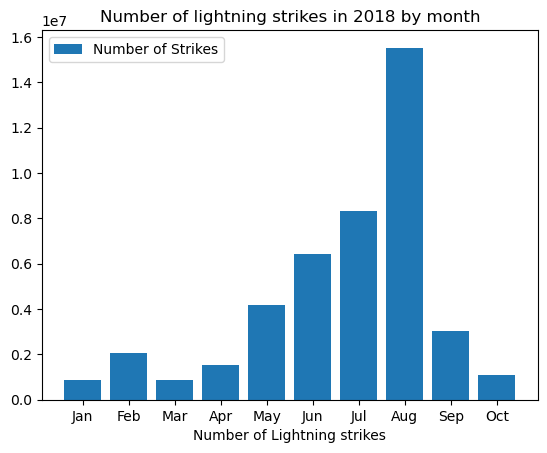

In [16]:
# plot a bar chart
plt.bar(x=df_by_month['month_txt'],height=df_by_month['number_of_strikes'],label='Number of Strikes')
plt.plot()

plt.xlabel('Months(2018)')
plt.xlabel('Number of Lightning strikes')
plt.title('Number of lightning strikes in 2018 by month')
plt.legend()
plt.show()

## Conclusion

If you have successfully completed the material above, congratulations! You now have some of the fundamental elements of data discovery that you can apply to your own datasets. 